In [1]:
from sentence_transformers import CrossEncoder
import logging
import os
import pandas as pd
import torch, gc
from importlib import reload

import financerag.tasks.Base_Task; reload(financerag.tasks.Base_Task)
import financerag.tasks.ConvFinQATask; reload(financerag.tasks.ConvFinQATask)
import financerag.tasks.FinanceBenchTask; reload(financerag.tasks.FinanceBenchTask)
import financerag.tasks.FinDERTask; reload(financerag.tasks.FinDERTask)
import financerag.tasks.FinQATask; reload(financerag.tasks.FinQATask)
import financerag.tasks.FinQABenchTask; reload(financerag.tasks.FinQABenchTask)
import financerag.tasks.MultiHierttTask; reload(financerag.tasks.MultiHierttTask)
import financerag.tasks.TATQATask; reload(financerag.tasks.TATQATask)
reload(financerag.tasks)

from financerag.rerank import CrossEncoderReranker
from financerag.retrieval import DenseRetrieval, SentenceTransformerEncoder, BM25Retriever, HybridRetriever
from financerag.tasks import ConvFinQA, FinanceBench, FinDER, FinQA, FinQABench, MultiHiertt, TATQA

# Setup basic logging configuration to show info level messages.
logging.basicConfig(level=logging.INFO)

/opt/conda/envs/DSC/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Task

In [2]:
# Step 2: Initialize FinDER Task

convfinqa_task = ConvFinQA()
finbench_task = FinanceBench()
finder_task = FinDER()
finqa_task = FinQA()
finqabench_task = FinQABench()
multih_task = MultiHiertt()
tatqa_task = TATQA()

changed
Ok
Ok
Ok
Ok
Ok
Ok
Ok


# Initialize Model

In [3]:
# 줄임말 확장
# 테이블을 instruction: 테이블 컴포넌트를 뽑아달라고

In [6]:
# Step 3: Initialize DenseRetriever model

# You can replace 'intfloat/e5-large-v2' with any other model supported by SentenceTransformers.
# For example: 'BAAI/bge-large-en-v1.5', 'Linq-AI-Research/Linq-Embed-Mistral', etc.
base_encoder = "BAAI/bge-m3" # "intfloat/multilingual-e5-large-instruct"  #"BAAI/bge-large-en-v1.5" #"nvidia/NV-Embed-v2"(20GB) "intfloat/e5-mistral-7b-instruct"(9GB) 
                                            #"dunzhang/stella_en_1.5B_v5" (6GB)  "jinaai/jina-embeddings-v3"(1.1GB) "jinaai/jina-embeddings-v2-base-code"(320MB)
encoder_model = SentenceTransformerEncoder(
    model_name_or_path=base_encoder,
    query_prompt='query: ',
    doc_prompt='passage: '
)

retrieval_model = DenseRetrieval(
     model=encoder_model
 )

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cuda
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


batch size: 16


In [4]:
# bm25_retriever = BM25Retriever()
# dense_retriever = DenseRetrieval(model=encoder_model)

# # Initialize the hybrid retriever
# hybrid_retriever = HybridRetriever(
#     lexical_retriever=bm25_retriever,
#     dense_retriever=dense_retriever,
#     lexical_weight=0.4,
#     dense_weight=0.6
# )

batch size: 16


In [6]:
# Step 4: Perform retrieval

print("Working on ConvfinQA Task")
convfinqa_result = convfinqa_task.retrieve(
    retriever=retrieval_model)
torch.cuda.empty_cache()
print("Working on FinBench Task")
finbench_result = finbench_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()
print("Working on FinDER Task")
finder_result = finder_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()
print("Working on FinQA Task")
finqa_result = finqa_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()
print("Working on FinQABench Task")
finqabench_result = finqabench_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()
print("Working on MultiHiertt Task")
multih_result = multih_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()
print("Working on TATQA Task")
tatqa_result = tatqa_task.retrieve(
    retriever=hybrid_retriever)
torch.cuda.empty_cache()

results = [
    convfinqa_result,
    finbench_result,
    finder_result,
    finqa_result,
    finqabench_result,
    multih_result,
    tatqa_result
]

Working on ConvfinQA Task


INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/130 [00:00<?, ?it/s]

INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases


Working on FinBench Task


INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Working on FinDER Task


INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/867 [00:00<?, ?it/s]

Working on FinQA Task


INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/175 [00:00<?, ?it/s]

INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Working on FinQABench Task


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Working on MultiHiertt Task


INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/655 [00:00<?, ?it/s]

Working on TATQA Task


INFO:financerag.retrieval.bm25:Tokenizing queries with lower cases
INFO:financerag.retrieval.dense:Encoding queries...


Batches:   0%|          | 0/104 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/173 [00:00<?, ?it/s]

In [ ]:
# # Step 4: Perform retrieval

# print("Working on ConvfinQA Task")
# convfinqa_result = convfinqa_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on FinBench Task")
# finbench_result = finbench_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on FinDER Task")
# finder_result = finder_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on FinQA Task")
# finqa_result = finqa_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on FinQABench Task")
# finqabench_result = finqabench_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on MultiHiertt Task")
# multih_result = multih_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()
# print("Working on TATQA Task")
# tatqa_result = tatqa_task.retrieve(
#     retriever=retrieval_model)
# torch.cuda.empty_cache()

# results = [
#     convfinqa_result,
#     finbench_result,
#     finder_result,
#     finqa_result,
#     finqabench_result,
#     multih_result,
#     tatqa_result
# ]

INFO:financerag.retrieval.dense:Encoding queries...


Working on ConvfinQA Task


Batches:   0%|          | 0/27 [00:00<?, ?it/s]

INFO:financerag.retrieval.dense:Sorting corpus by document length...
INFO:financerag.retrieval.dense:Encoding corpus in batches... This may take a while.
INFO:financerag.retrieval.dense:Encoding batch 1/1...


Batches:   0%|          | 0/130 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# # Print a portion of the retrieval results to verify the output.
# for result in results:
#     print(f"Retrieved results for {len(result)} queries. Here's an example of the top 5 documents for the first query:")

# for result in results:
#     for q_id, res in result.items():
#         print(f"\nQuery ID: {q_id}")
#         # Sort the result to print the top 5 document ID and its score
#         sorted_results = sorted(res.items(), key=lambda x: x[1], reverse=True)

#         for i, (doc_id, score) in enumerate(sorted_results[:5]):
#             print(f"  Document {i + 1}: Document ID = {doc_id}, Score = {score}")

#         break  # Only show the first query

## Evaluation

In [7]:
def get_evalset(dataset_name):
    qrels = {}
    df_qrels = pd.read_csv(f"./data/test/{dataset_name}_qrels.tsv", sep='\t')
    for _, row in df_qrels.iterrows():
        if row['query_id'] not in qrels:
            qrels[row['query_id']] = {}
        qrels[row['query_id']][row['corpus_id']] = row['score']
    return qrels

In [8]:
tasks = [
    convfinqa_task,
    finbench_task,
    finder_task,
    finqa_task,
    finqabench_task,
    multih_task,
    tatqa_task
]

qrels = [
    get_evalset('ConvFinQA'),
    get_evalset('FinanceBench'),
    get_evalset('FinDER'),
    get_evalset('FinQA'),
    get_evalset('FinQABench'),
    get_evalset('MultiHeirtt'),
    get_evalset('TATQA')
]

# for qrel, task in zip(qrels, tasks):
#     metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])
#     retrieve_ndcgs.append()

In [ ]:
import matplotlib.pyplot as plt

ndcg_values = []
map_values = []
recall_values = []
precision_values = []

dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

for qrel, task in zip(qrels, tasks):

    metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])

    ndcg_values.append(metrics[0]['NDCG@10'])  # NDCG@10
    map_values.append(metrics[1]['MAP@10'])    # MAP@10
    recall_values.append(metrics[2]['Recall@10'])  # Recall@10
    precision_values.append(metrics[3]['P@10'])  # P@10

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(ndcg_values, marker='o', label='NDCG@10', color='b')
plt.title('NDCG@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(map_values, marker='o', label='MAP@10', color='g')
plt.title('MAP@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(recall_values, marker='o', label='Recall@10', color='r')
plt.title('Recall@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(precision_values, marker='o', label='P@10', color='c')
plt.title('Precision@10')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.grid(True)

plt.tight_layout()
plt.show()

INFO:financerag.tasks.Base_Task:NDCG@10: 0.5085


ZeroDivisionError: float division by zero

임베딩까지 해놨어요

# Initialize Reranker

"jinaai/jina-reranker-v2-base-multilingual",
            "Alibaba-NLP/gte-multilingual-reranker-base",
        "BAAI/bge-reranker-v2-m3"

In [8]:
# Step 5: Initialize CrossEncoder Reranker
base_reranker = "BAAI/bge-reranker-base" #"BAAI/bge-reranker-v2-m3" #"jinaai/jina-reranker-v2-base-multilingual" #'cross-encoder/ms-marco-MiniLM-L-12-v2' #"BAAI/bge-reranker-base"

reranker = CrossEncoderReranker(
    model=CrossEncoder(base_reranker)
)

INFO:sentence_transformers.cross_encoder.CrossEncoder:Use pytorch device: cuda


# Perform Reranking (1)

In [ ]:
# Step 6: Perform rerankin

top_k= 80 # Number of Reranking results
batch_size = 16 # 32

print("\nWorking on ConvFinQA Reranking")
convfinqa_rerank = convfinqa_task.rerank(
    reranker=reranker,
    results=convfinqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinBench Reranking")
finbench_rerank = finbench_task.rerank(
    reranker=reranker,
    results=finbench_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinDER Reranking")
finder_rerank = finder_task.rerank(
    reranker=reranker,
    results=finder_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQA Reranking")
finqa_rerank = finqa_task.rerank(
    reranker=reranker,
    results=finqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQABench Reranking")
finqabench_rerank = finqabench_task.rerank(
    reranker=reranker,
    results=finqabench_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on MultiHiertt Reranking")
multih_rerank = multih_task.rerank(
    reranker=reranker,
    results=multih_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on TATQA Reranking")
tatqa_rerank = tatqa_task.rerank(
    reranker=reranker,
    results=tatqa_result,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
reranking_results = [
    convfinqa_rerank,
    finbench_rerank,
    finder_rerank,
    finqa_rerank,
    finqabench_rerank,
    multih_rerank,
    tatqa_rerank
]


In [11]:
# for i, rerank_result in enumerate(reranking_results):
#     print(f"\nReranking results for Task {i + 1} ({len(rerank_result)} queries). Here's an example of the top 5 documents for the first query:")

#     for q_id, result in rerank_result.items():
#         print(f"\nQuery ID: {q_id}")
        
#         sorted_results = sorted(result.items(), key=lambda x: x[1], reverse=True)

#         for i, (doc_id, score) in enumerate(sorted_results[:5]):
#             print(f"  Document {i + 1}: Document ID = {doc_id}, Score = {score}")

#         break  # Only show the first query for each task

## Evaluation

In [ ]:
import matplotlib.pyplot as plt

# 각 평가지표를 저장할 리스트
retrieval_ndcg_values = []
rerank_ndcg_values = []

retrieval_map_values = []
rerank_map_values = []

retrieval_recall_values = []
rerank_recall_values = []

retrieval_precision_values = []
rerank_precision_values = []

# 데이터셋 이름 리스트
dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

for qrel, task in zip(qrels, tasks):
    # 평가지표 평가 (retrieval 결과)
    retrieval_metrics = task.evaluate(qrels=qrel, results=task.retrieve_results, k_values=[10])
    
    # 평가지표 평가 (rerank 결과)
    rerank_metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])

    retrieval_ndcg_values.append(retrieval_metrics[0]['NDCG@10'])
    retrieval_map_values.append(retrieval_metrics[1]['MAP@10'])
    retrieval_recall_values.append(retrieval_metrics[2]['Recall@10'])
    retrieval_precision_values.append(retrieval_metrics[3]['P@10'])
    
    rerank_ndcg_values.append(rerank_metrics[0]['NDCG@10'])
    rerank_map_values.append(rerank_metrics[1]['MAP@10'])
    rerank_recall_values.append(rerank_metrics[2]['Recall@10'])
    rerank_precision_values.append(rerank_metrics[3]['P@10'])

# 그래프 생성
plt.figure(figsize=(14, 10))

# NDCG@10 시각화
plt.subplot(2, 2, 1)
plt.plot(retrieval_ndcg_values, marker='o', label='Retrieval NDCG@10', color='b')
plt.plot(rerank_ndcg_values, marker='x', label='Rerank NDCG@10', color='b', linestyle='--')
plt.title('NDCG@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
plt.legend()
plt.grid(True)

# # MAP@10 시각화
# plt.subplot(2, 2, 2)
# plt.plot(retrieval_map_values, marker='o', label='Retrieval MAP@10', color='g')
# plt.plot(rerank_map_values, marker='x', label='Rerank MAP@10', color='g', linestyle='--')
# plt.title('MAP@10 Comparison')
# plt.xlabel('Dataset')
# plt.ylabel('Score')
# plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
# plt.legend()
# plt.grid(True)

# # Recall@10 시각화
# plt.subplot(2, 2, 3)
# plt.plot(retrieval_recall_values, marker='o', label='Retrieval Recall@10', color='r')
# plt.plot(rerank_recall_values, marker='x', label='Rerank Recall@10', color='r', linestyle='--')
# plt.title('Recall@10 Comparison')
# plt.xlabel('Dataset')
# plt.ylabel('Score')
# plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
# plt.legend()
# plt.grid(True)

# # Precision@10 시각화
# plt.subplot(2, 2, 4)
# plt.plot(retrieval_precision_values, marker='o', label='Retrieval P@10', color='c')
# plt.plot(rerank_precision_values, marker='x', label='Rerank P@10', color='c', linestyle='--')
# plt.title('Precision@10 Comparison')
# plt.xlabel('Dataset')
# plt.ylabel('Score')
# plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)  # X축에 데이터셋 이름을 설정
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# Perform Reranking (2)

In [ ]:
# Step 5: Initialize CrossEncoder Reranker
base_reranker2 = "BAAI/bge-reranker-v2-m3" #"BAAI/bge-reranker-v2-m3" #"jinaai/jina-reranker-v2-base-multilingual" #'cross-encoder/ms-marco-MiniLM-L-12-v2' #"BAAI/bge-reranker-base"

reranker2 = CrossEncoderReranker(
    model=CrossEncoder(base_reranker2)
)

In [ ]:
# Step 6: Perform reranking

top_k= 20 # Number of Reranking results
batch_size = 8 # 32

print("\nWorking on ConvFinQA Reranking")
convfinqa_rerank_second = convfinqa_task.rerank(
    reranker=reranker2,
    results=convfinqa_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinBench Reranking")
finbench_rerank_second = finbench_task.rerank(
    reranker=reranker2,
    results=finbench_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinDER Reranking")
finder_rerank_second = finder_task.rerank(
    reranker=reranker2,
    results=finder_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQA Reranking")
finqa_rerank_second = finqa_task.rerank(
    reranker=reranker2,
    results=finqa_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on FinQABench Reranking")
finqabench_rerank_second = finqabench_task.rerank(
    reranker=reranker2,
    results=finqabench_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on MultiHiertt Reranking")
multih_rerank_second = multih_task.rerank(
    reranker=reranker2,
    results=multih_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
print("\nWorking on TATQA Reranking")
tatqa_rerank_second = tatqa_task.rerank(
    reranker=reranker2,
    results=tatqa_rerank,
    top_k=top_k,  # Rerank the top 100 documents
    batch_size=batch_size
)
torch.cuda.empty_cache()
reranking_results_second = [
    convfinqa_rerank_second,
    finbench_rerank_second,
    finder_rerank_second,
    finqa_rerank_second,
    finqabench_rerank_second,
    multih_rerank_second,
    tatqa_rerank_second
]


## Evaluation

In [ ]:
import matplotlib.pyplot as plt

rerank_second_ndcg_values = []
rerank_second_map_values = []
rerank_second_recall_values = []
rerank_second_precision_values = []

dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

for qrel, task in zip(qrels, tasks):
    rerank_second_metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])
    rerank_second_ndcg_values.append(rerank_second_metrics[0]['NDCG@10'])
    rerank_second_map_values.append(rerank_second_metrics[1]['MAP@10'])
    rerank_second_recall_values.append(rerank_second_metrics[2]['Recall@10'])
    rerank_second_precision_values.append(rerank_second_metrics[3]['P@10'])

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(retrieval_ndcg_values, marker='o', label='Retrieval NDCG@10', color='b')
plt.plot(rerank_ndcg_values, marker='x', label='Rerank NDCG@10', color='b', linestyle='--')
plt.plot(rerank_second_ndcg_values, marker='s', label='Rerank Second NDCG@10', color='b', linestyle='-.')
plt.title('NDCG@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(retrieval_map_values, marker='o', label='Retrieval MAP@10', color='g')
plt.plot(rerank_map_values, marker='x', label='Rerank MAP@10', color='g', linestyle='--')
plt.plot(rerank_second_map_values, marker='s', label='Rerank Second MAP@10', color='g', linestyle='-.')
plt.title('MAP@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(retrieval_recall_values, marker='o', label='Retrieval Recall@10', color='r')
plt.plot(rerank_recall_values, marker='x', label='Rerank Recall@10', color='r', linestyle='--')
plt.plot(rerank_second_recall_values, marker='s', label='Rerank Second Recall@10', color='r', linestyle='-.')
plt.title('Recall@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(retrieval_precision_values, marker='o', label='Retrieval P@10', color='c')
plt.plot(rerank_precision_values, marker='x', label='Rerank P@10', color='c', linestyle='--')
plt.plot(rerank_second_precision_values, marker='s', label='Rerank Second P@10', color='c', linestyle='-.')
plt.title('Precision@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
## reranker 3

In [19]:
# Step 5: Initialize CrossEncoder Reranker
base_reranker3 = "BAAI/bge-reranker-v2-m3" #"BAAI/bge-reranker-v2-m3" #"jinaai/jina-reranker-v2-base-multilingual" #'cross-encoder/ms-marco-MiniLM-L-12-v2' #"BAAI/bge-reranker-base"

reranker3 = CrossEncoderReranker(
    model=CrossEncoder(base_reranker2)
)

INFO:sentence_transformers.cross_encoder.CrossEncoder:Use pytorch device: cuda


INFO:financerag.tasks.Base_Task:NDCG@10: 0.5482
INFO:financerag.tasks.Base_Task:NDCG@10: 0.8114
INFO:financerag.tasks.Base_Task:NDCG@10: 0.5459
INFO:financerag.tasks.Base_Task:NDCG@10: 0.4811
INFO:financerag.tasks.Base_Task:NDCG@10: 0.8449
INFO:financerag.tasks.Base_Task:NDCG@10: 0.1375
INFO:financerag.tasks.Base_Task:NDCG@10: 0.5259


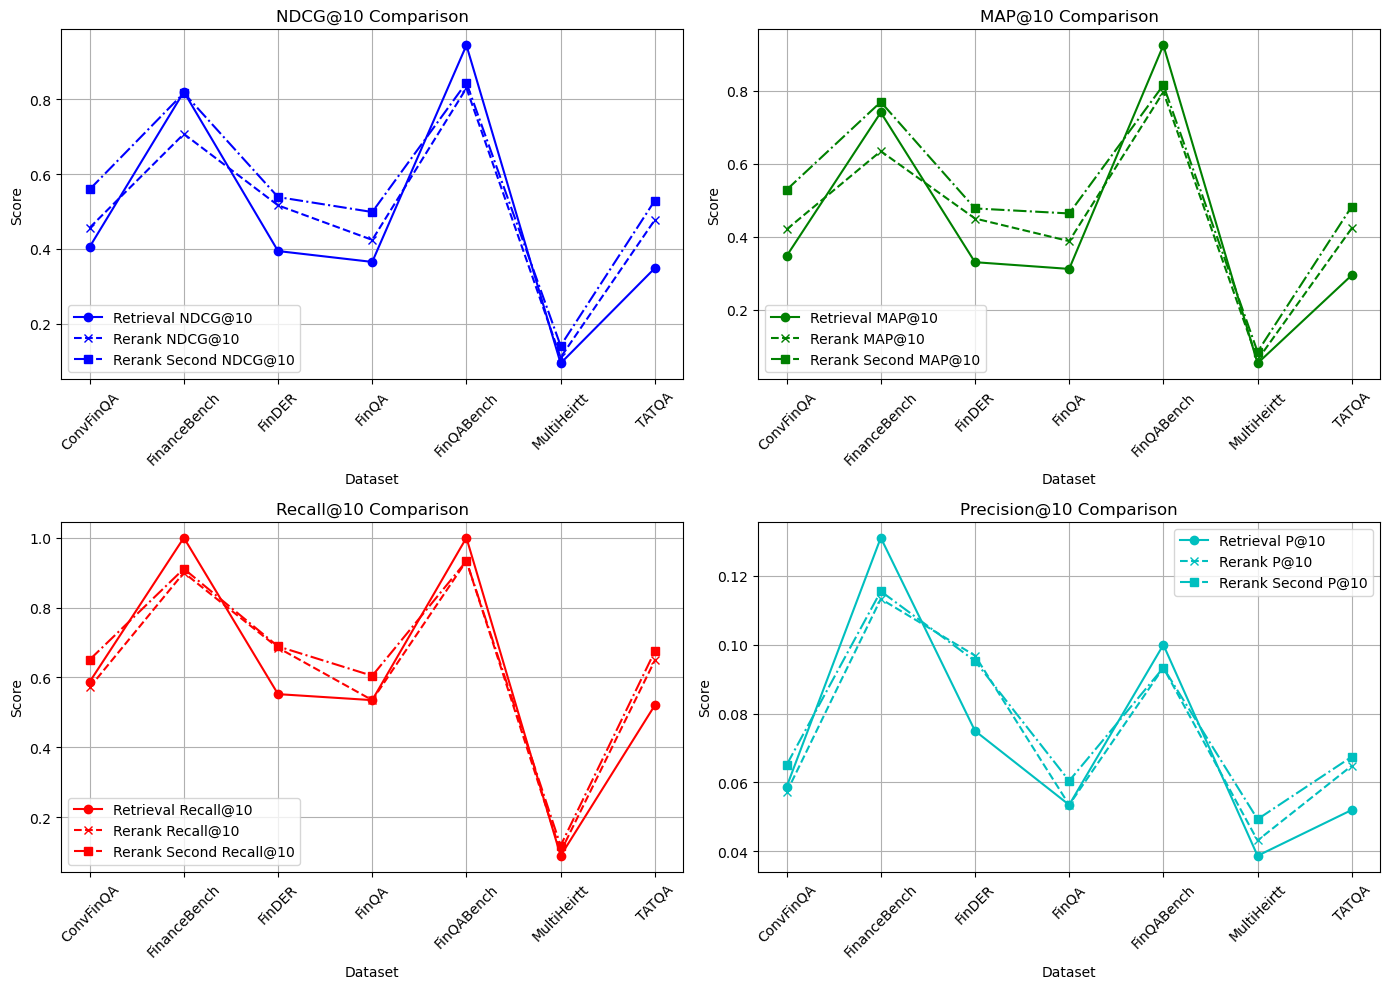

In [21]:
import matplotlib.pyplot as plt

rerank_third_ndcg_values = []
rerank_third_map_values = []
rerank_third_recall_values = []
rerank_third_precision_values = []

dataset_names = [
    'ConvFinQA',
    'FinanceBench',
    'FinDER',
    'FinQA',
    'FinQABench',
    'MultiHeirtt',
    'TATQA'
]

for qrel, task in zip(qrels, tasks):
    rerank_third_metrics = task.evaluate(qrels=qrel, results=task.rerank_results, k_values=[10])
    rerank_third_ndcg_values.append(rerank_third_metrics[0]['NDCG@10'])
    rerank_third_map_values.append(rerank_third_metrics[1]['MAP@10'])
    rerank_third_recall_values.append(rerank_third_metrics[2]['Recall@10'])
    rerank_third_precision_values.append(rerank_third_metrics[3]['P@10'])

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(retrieval_ndcg_values, marker='o', label='Retrieval NDCG@10', color='b')
plt.plot(rerank_ndcg_values, marker='x', label='Rerank NDCG@10', color='b', linestyle='--')
plt.plot(rerank_second_ndcg_values, marker='s', label='Rerank Second NDCG@10', color='b', linestyle='-.')
plt.title('NDCG@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(retrieval_map_values, marker='o', label='Retrieval MAP@10', color='g')
plt.plot(rerank_map_values, marker='x', label='Rerank MAP@10', color='g', linestyle='--')
plt.plot(rerank_second_map_values, marker='s', label='Rerank Second MAP@10', color='g', linestyle='-.')
plt.title('MAP@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(retrieval_recall_values, marker='o', label='Retrieval Recall@10', color='r')
plt.plot(rerank_recall_values, marker='x', label='Rerank Recall@10', color='r', linestyle='--')
plt.plot(rerank_second_recall_values, marker='s', label='Rerank Second Recall@10', color='r', linestyle='-.')
plt.title('Recall@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(retrieval_precision_values, marker='o', label='Retrieval P@10', color='c')
plt.plot(rerank_precision_values, marker='x', label='Rerank P@10', color='c', linestyle='--')
plt.plot(rerank_second_precision_values, marker='s', label='Rerank Second P@10', color='c', linestyle='-.')
plt.title('Precision@10 Comparison')
plt.xlabel('Dataset')
plt.ylabel('Score')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Save Results

In [16]:
os.getcwd()

'/data/DSC/Financerag'

In [22]:
# Step 7: Save results
results_dir = './financerag/results/'
subfolder = 'submission_11301800'

output_dir = results_dir+subfolder
convfinqa_task.save_results(output_dir=output_dir)
finbench_task.save_results(output_dir=output_dir)
finder_task.save_results(output_dir=output_dir)
finqa_task.save_results(output_dir=output_dir)
finqabench_task.save_results(output_dir=output_dir)
multih_task.save_results(output_dir=output_dir)
tatqa_task.save_results(output_dir=output_dir)

csv_files = [
    output_dir + '/ConvFinQA/results.csv',
    output_dir + '/FinanceBench/results.csv',
    output_dir + '/FinDER/results.csv',
    output_dir + '/FinQA/results.csv',
    output_dir + '/FinQABench/results.csv',
    output_dir + '/MultiHiertt/results.csv',
    output_dir + '/TAT-QA/results.csv'
]

results_df = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(results_df, ignore_index=False)
combined_df.to_csv(output_dir+'/'+subfolder+'.csv', index=False)

INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/ConvFinQA
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/FinanceBench
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/FinDER
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/FinQA
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/FinQABench
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/MultiHiertt
INFO:financerag.tasks.Base_Task:Output directory set to: ./financerag/results/submission_11301６00/TAT-QA


In [44]:
os.getcwd()

'c:\\Users\\God_YJ\\interns\\DS_COMP\\FinanceRAG-main'

In [18]:
sample = pd.read_csv('../data/sample_submission.csv')
sample.head()

,query_id,corpus_id
0,qd496c6a0,dd4b92b32
1,qd496c6a0,dd4ba2a5a
2,qd496c6a0,dd4be1f98
3,qd496c6a0,dd4ba07d2
4,qd496c6a0,dd4ba02f0


In [21]:
# sample과 combined_df에서 고유한 query_id 값 얻기
sample_query_ids = sample['query_id'].unique()
combined_query_ids = combined_df['query_id'].unique()

# sample과 combined_df에만 존재하는 query_id 값 구하기
sample_only_query_ids = list(set(sample_query_ids) - set(combined_query_ids))
combined_only_query_ids = list(set(combined_query_ids) - set(sample_query_ids))

# 결과 출력
print("query_id present only in sample:")
print(sample_only_query_ids)

print("query_id present only in combined_df:")
print(combined_only_query_ids)


query_id present only in sample:
['query_id']
query_id present only in combined_df:
['q00097', 'qd2abb228', 'q00029']
